In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [309]:
df=pd.read_csv("/content/titanic_train.csv")
df2=pd.read_csv("/content/titanic_test.csv")  #test data

In [310]:
df.shape

(891, 12)

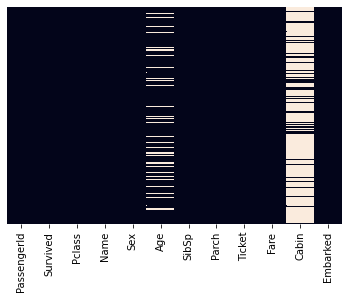

In [311]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [313]:
for i in df.columns:
    d=dict(df[i].isnull().value_counts())
    print(i,d)

PassengerId {False: 891}
Survived {False: 891}
Pclass {False: 891}
Name {False: 891}
Sex {False: 891}
Age {False: 714, True: 177}
SibSp {False: 891}
Parch {False: 891}
Ticket {False: 891}
Fare {False: 891}
Cabin {True: 687, False: 204}
Embarked {False: 889, True: 2}


###### Handling Na in Embarked

In [314]:
f=df['Embarked'].isna()
df.loc[f]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [315]:
df.loc[f,'Embarked'] ='S'  #Ticket and cabin same for both the passenger, so assumed boarded from same location

###### Handling Nan in Age Columns

###### Getting the avg age of male and female for all the classes

In [316]:
dfmale=df.loc[df['Sex']=='male']    
dffemale=df.loc[df['Sex']=='female']

In [317]:
g=dfmale.groupby(['Pclass'])
g['Age'].median()

Pclass
1    40.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [318]:
g=dffemale.groupby(['Pclass'])
g['Age'].median()

Pclass
1    35.0
2    28.0
3    21.5
Name: Age, dtype: float64

In [319]:
f1=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==1)  #fillted the missing Age for men with median age of men
df.loc[f1,'Age']=40.0

In [320]:
f2=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==2)  #fillted the missing Age for men with median age of men
df.loc[f2,'Age']=30.0

In [321]:
f3=(df['Age'].isnull()) & (df['Sex']=='male') & (df['Pclass']==3)  #fillted the missing Age for men with median age of men
df.loc[f3,'Age']=25

In [322]:
f4=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==1)  #fillted the missing Age for men with median age of men
df.loc[f4,'Age']=35.0

In [323]:
f5=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==2)  #fillted the missing Age for men with median age of men
df.loc[f5,'Age']=28.0

In [324]:
f6=(df['Age'].isnull()) & (df['Sex']=='female') & (df['Pclass']==3)  #fillted the missing Age for men with median age of men
df.loc[f6,'Age']=21.5

In [325]:
df['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

###### used the same median value from the train to fill the test data

In [326]:
f7=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==1)  #fillted the missing Age for men with median age of men
df2.loc[f7,'Age']=40.0

In [327]:
f8=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==2)  #fillted the missing Age for men with median age of men
df2.loc[f8,'Age']=30.0

In [328]:
f9=(df2['Age'].isnull()) & (df2['Sex']=='male') & (df2['Pclass']==3)  #fillted the missing Age for men with median age of men
df2.loc[f9,'Age']=25

In [329]:
f10=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==1)  #fillted the missing Age for men with median age of men
df2.loc[f10,'Age']=35.0

In [330]:
f11=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==2)  #fillted the missing Age for men with median age of men
df2.loc[f11,'Age']=28.0

In [331]:
f12=(df2['Age'].isnull()) & (df2['Sex']=='female') & (df2['Pclass']==3)  #fillted the missing Age for men with median age of men
df2.loc[f12,'Age']=21.5

In [332]:
df2['Age'].isnull().value_counts()

False    418
Name: Age, dtype: int64

###### Handling Fare

In [333]:
f5=df2['Fare'].isnull()
df2.loc[f5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [334]:
g3=df.groupby(['Embarked'])
g3['Fare'].median()


Embarked
C    29.70
Q     7.75
S    13.00
Name: Fare, dtype: float64

In [335]:
df2.loc[f5,'Fare']=13  #filled with median fare of Embarked 'S'

In [336]:
df['Age'].describe() #behaviour of df['Age]

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

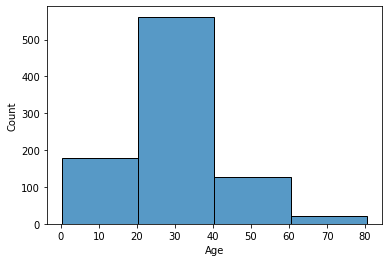

In [337]:
from scipy.stats import norm
sns.histplot(df['Age'],kde=False,binwidth=20)

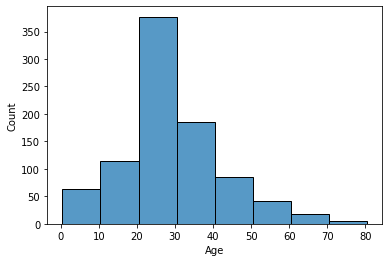

In [338]:
sns.histplot(df['Age'],kde=False,binwidth=10)

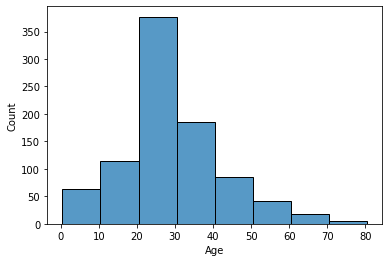

In [339]:
sns.histplot(df['Age'],kde=False,binwidth=10)

In [340]:
df['Age_group']=pd.cut(df['Age'],bins=(0,10,20,30,40,50,60,70,80),labels=['10','20','30','40','50','60','70','80'])
df2['Age_group']=pd.cut(df2['Age'],bins=(0,10,20,30,40,50,60,70,80),labels=['10','20','30','40','50','60','70','80'])

In [341]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_group'],
      dtype='object')

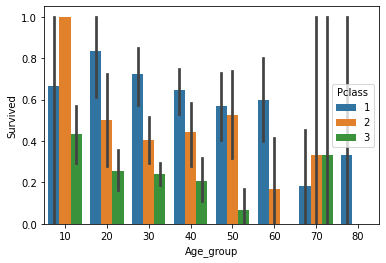

In [342]:
sns.barplot(x='Age_group',y='Survived',hue='Pclass',data=df)

##### Creating X and y data

In [343]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_group'],
      dtype='object')

In [344]:
X=df[['Pclass', 'Sex', 'Age_group', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [345]:
y=df['Survived']

In [346]:
Xt=df2[['Pclass', 'Sex', 'Age_group', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

##### One Hot Encoding

In [347]:
temp_x1=pd.get_dummies(X['Embarked'],drop_first=True)
X=pd.concat([X,temp_x1],axis=1)
X.drop(columns='Embarked',inplace=True)

###### Test -[Embarked]

In [348]:
temp_xt1=pd.get_dummies(Xt['Embarked'],drop_first=True) 
Xt=pd.concat([Xt,temp_xt1],axis=1)
Xt.drop(columns='Embarked',inplace=True)

In [349]:
temp_x2=pd.get_dummies(X['Sex'],drop_first=True) 
X=pd.concat([X,temp_x2],axis=1)
X.drop(columns='Sex',inplace=True)

In [350]:
temp_xt2=pd.get_dummies(Xt['Sex'],drop_first=True) 
Xt=pd.concat([Xt,temp_xt2],axis=1)
Xt.drop(columns='Sex',inplace=True)

In [ ]:
temp_x3=pd.get_dummies(X['Age_group'],drop_first=True) 
X=pd.concat([X,temp_x3],axis=1)
X=X.drop(columns='Age_group')

In [352]:
temp_xt3=pd.get_dummies(Xt['Age_group'],drop_first=True) 
Xt=pd.concat([Xt,temp_xt3],axis=1)
Xt=Xt.drop(columns='Age_group')

In [353]:

Xt.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male', '20', '30', '40',
       '50', '60', '70', '80'],
      dtype='object')

In [373]:

X.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'male', '20', '30', '40',
       '50', '60', '70', '80'],
      dtype='object')

In [355]:
Xt.notnull().count()

Pclass    418
SibSp     418
Parch     418
Fare      418
Q         418
S         418
male      418
20        418
30        418
40        418
50        418
60        418
70        418
80        418
dtype: int64

In [372]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   Q       418 non-null    uint8  
 5   S       418 non-null    uint8  
 6   male    418 non-null    uint8  
 7   20      418 non-null    uint8  
 8   30      418 non-null    uint8  
 9   40      418 non-null    uint8  
 10  50      418 non-null    uint8  
 11  60      418 non-null    uint8  
 12  70      418 non-null    uint8  
 13  80      418 non-null    uint8  
dtypes: float64(1), int64(3), uint8(10)
memory usage: 17.3 KB


#### Split model

In [374]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [375]:
X.shape

(891, 14)

In [376]:
Xt.shape

(418, 14)

In [377]:
SVM

NameError: ignored

In [378]:
test_clf=[]
train_clf=[]
index_data=[]
for  i in (.5,.7,.9,1,1.2,1.4,1.6,1.8):
  clf = make_pipeline(StandardScaler(), SVC(C=i,gamma='auto'))
  clf.fit(X, y)
  print(i,clf.score(X_test,y_test))
  print(i,clf.score(X_train,y_train))
  test_clf.append(clf.score(X_test,y_test))
  train_clf.append(clf.score(X_train,y_train))
  index_data.append(i)

0.5 0.8212290502793296
0.5 0.8356741573033708
0.7 0.8212290502793296
0.7 0.8398876404494382
0.9 0.8268156424581006
0.9 0.8398876404494382
1 0.8268156424581006
1 0.8398876404494382
1.2 0.8379888268156425
1.2 0.8412921348314607
1.4 0.8435754189944135
1.4 0.8455056179775281
1.6 0.8435754189944135
1.6 0.8469101123595506
1.8 0.8379888268156425
1.8 0.848314606741573


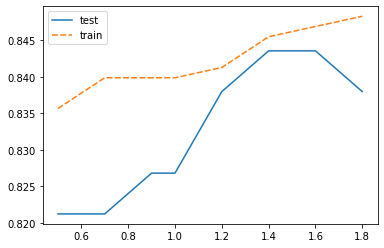

In [379]:
scoredf=pd.DataFrame({'test':test_clf,'train':train_clf},index=index_data)
sns.lineplot(data=scoredf)

In [380]:
clf = make_pipeline(StandardScaler(), SVC(C=1.8,gamma='auto'))
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.8, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [381]:
y_pred_svm=clf.predict(Xt)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [382]:
X.shape

(891, 14)

In [385]:
submission=pd.DataFrame({"PassengerId" : df2['PassengerId'],"Survived" :y_pred_svm})
submission.to_csv("titanic_svm2.csv",index=False)